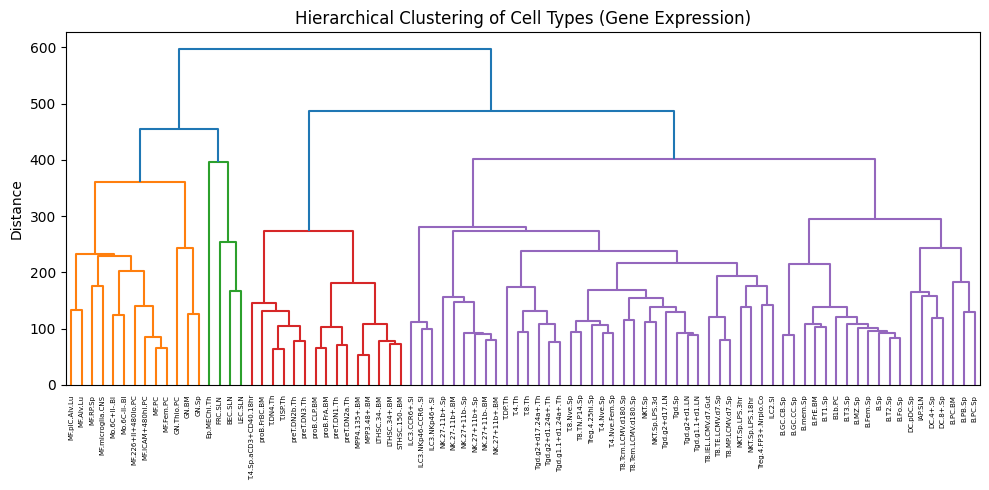

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\helen\\Documents\\downloads\\ImmGenATAC18_AllOCRsInfo.csv'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

RNA_seq_path=r"C:\Users\helen\Downloads\datasets\mmc2.csv"
RNA_seq=pd.read_csv(RNA_seq_path,index_col=0)
RNA_seq_T=RNA_seq.T
RNA_seq_log = np.log1p(RNA_seq_T) 

# Z-score normalize features (genes) for clustering
scaler = StandardScaler()
RNA_seq_log_scaled = pd.DataFrame(
    scaler.fit_transform(RNA_seq_log),
    index=RNA_seq_log.index,
    columns=RNA_seq_log.columns
)

# Compute linkage matrix
linkage_RNA = linkage(RNA_seq_log_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_RNA, labels=RNA_seq_log_scaled.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Cell Types (Gene Expression)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

import importlib
import functions
importlib.reload(functions)
functions.set_user('Helen')
data = functions.call_data_clean(p_threshold=1.3)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial import ConvexHull
import scanpy as sc

ATAC_T = data['ATAC_seq_T']
ATAC_scores = data ['norm']
QC = data['QC_metrics']
scores = data['norm']   
RNA_T= data['RNA_seq_T']


# Normalize
scaler = StandardScaler()
ATAC_T_scaled = pd.DataFrame(
    scaler.fit_transform(ATAC_T),
    index=ATAC_T.index,
    columns=ATAC_T.columns
)
linkage_atac = linkage(ATAC_T_scaled, method='ward')

#dendogram 
plt.figure(figsize=(10, 5))
dendrogram(linkage_atac, labels=ATAC_T_scaled.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Cell Types (ATAC-seq)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#distance matrices
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
from scipy.stats import spearmanr


coph_RNA, _ = cophenet(linkage_RNA, pdist(ATAC_T_scaled))
coph_atac, _ = cophenet(linkage_atac, pdist(ATAC_T_scaled))
corr, _ = spearmanr(coph_RNA, coph_atac)
print(f"Cophenetic correlation (gene vs ATAC): {corr:.3f}")

